## ABC Assignment 1 - Analysing the Heart Diesease Dataset

###### Report by : Anuttara Rajasinghe

#### Task 1: Data Exploration

For this task I'm encouraged to explore the dataset and perform various operations such as cleaning, feature selection, and feature engineering to prepare the data for analysis.

In [2]:
import pandas as pd
import numpy as np

In [3]:
clev_DF = pd.read_csv("C:/Users/USER/Documents/AI-ML-Bootcamp/Assignment-1_Heart_Diesease/Dataset/processed.cleveland.csv", header=None)
#the processed dataset was taken because the original wasn't UTF-8 encoded.

clev_DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Assigning colum names to make more sense of the data
col = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
                'thal', 'target']

clev_DF.columns = col


In [5]:
# Now we can view the column names
clev_DF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
import sweetviz as sv
report = sv.analyze(clev_DF)
report.show_html('C:/Users/USER/Documents/AI-ML-Bootcamp/Assignment-1_Heart_Diesease/Dataset/report.html')

C:\Users\USER\anaconda3\envs\dev\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\USER\anaconda3\envs\dev\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\USER\anaconda3\envs\dev\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\USER\anaconda3\envs\dev\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\USER\anaconda3\envs\dev\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\USER\anaconda3\envs\dev\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["m

Report C:/Users/USER/Documents/AI-ML-Bootcamp/Assignment-1_Heart_Diesease/Dataset/report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Replacing "?" with Na and dropping null values

In [7]:
clev_DF.replace("?", np.nan, inplace=True)
print("Number of records before dropping null values: ", clev_DF.shape[0])
clev_DF.dropna(inplace=True)
print("Number of records after dropping null values: ", clev_DF.shape[0])

#6 null records

Number of records before dropping null values:  303
Number of records after dropping null values:  297


Dropping duplicate values

In [8]:
print("Number of records before dropping duplicate values: ", clev_DF.shape[0])
clev_DF = clev_DF.drop_duplicates()
print("Number of records after dropping duplicate values: ", clev_DF.shape[0])

#No duplicates

Number of records before dropping duplicate values:  297
Number of records after dropping duplicate values:  297


Now our clean dataset looks like this

In [9]:
clev_DF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Here is some information about the dataset so far

In [10]:
clev_DF.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [11]:
clev_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


Plotting a correlation matrix to check the correlation among the features to target

C:\Users\USER\AppData\Local\Temp\ipykernel_12036\1426665998.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clev_DF.corr()


Text(0.5, 1.0, 'Correlation Matrix')

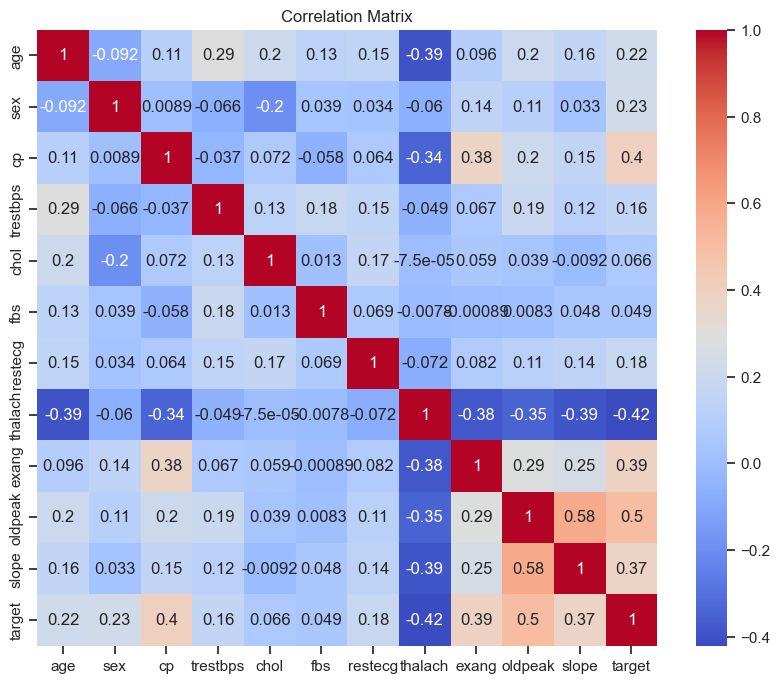

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = clev_DF.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

Performing a feature selection to get the features more than 0.1 correlation with the target variable

In [13]:
corr_threshold = 0

#Chatgpt used for checking the syntax of the code for feature selection
target_corr = corr_matrix['target']
selected_features = target_corr[abs(target_corr) > corr_threshold].index.tolist()

new_clev_DF = pd.DataFrame(clev_DF[selected_features])

print("Selected Features:")
display(new_clev_DF.head())

Selected Features:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0


In [14]:
print("Selected features summarized: ", new_clev_DF.columns.tolist())

Selected features summarized:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'target']


#### Task 2: Data Exploration

For this task I will analyze the dataset and perform exploratory data analysis to identify any trends or patterns in the data.

> Plotting the correlation matrix

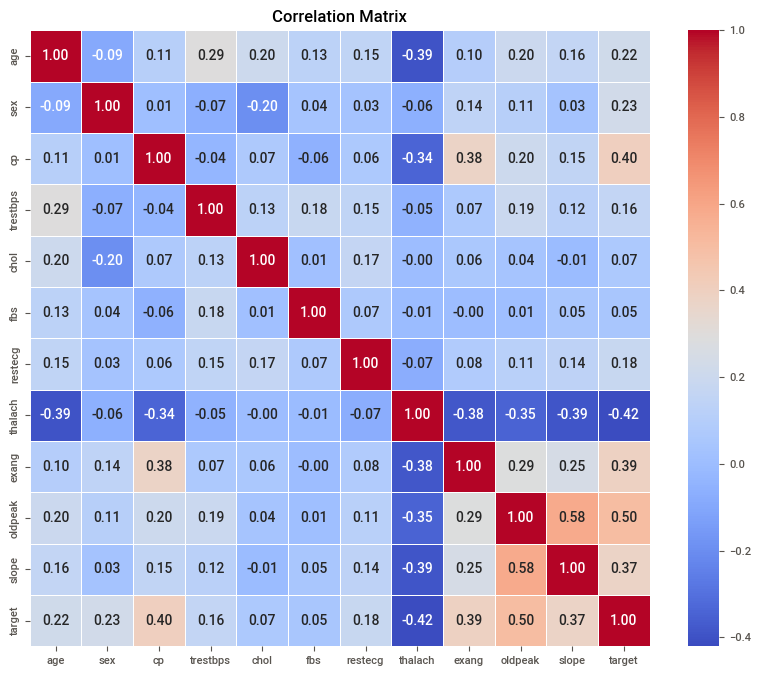

In [15]:
corr_matrix = new_clev_DF.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

This is the new correlation matrix after feature selection.

>Comparing the records taken by males and females

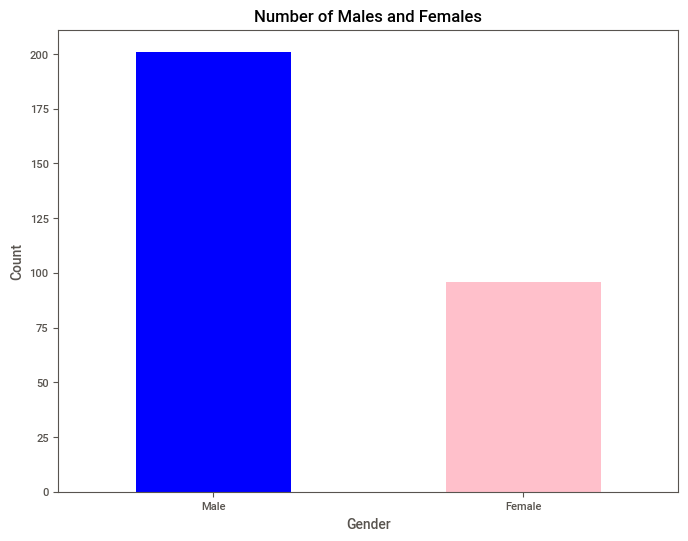

In [16]:
gender_counts = new_clev_DF['sex'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Males and Females')
plt.xticks(range(len(gender_counts)), ['Male', 'Female'], rotation=0)
plt.xticks(rotation=0)
plt.show()

As we can see, the number of male records in this dataset is much higher than the number of female records in this dataset, this may lead to bias when developing machine learning models. A solution can be to either oversample the female records or undersample the male records.

>Counting the number of records for classes of target variable

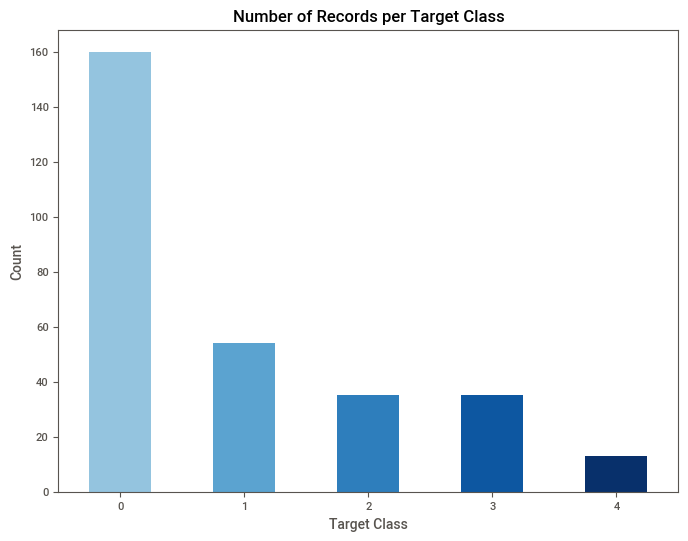

In [17]:
target_counts = new_clev_DF['target'].value_counts()

#chatgpt used to check code for colour scheme
t_colors = plt.cm.get_cmap('Blues')(np.linspace(0.4, 1, len(target_counts)))

plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=t_colors)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Number of Records per Target Class')
plt.xticks(rotation=0)
plt.show()

As per the documentation: "It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)." According to this, it shows that the number of records with no heart disease is much higher than the records with heart disease present and the lease being the highest stage of heart disease, an uneven distribution.

> Summarized Target Plot

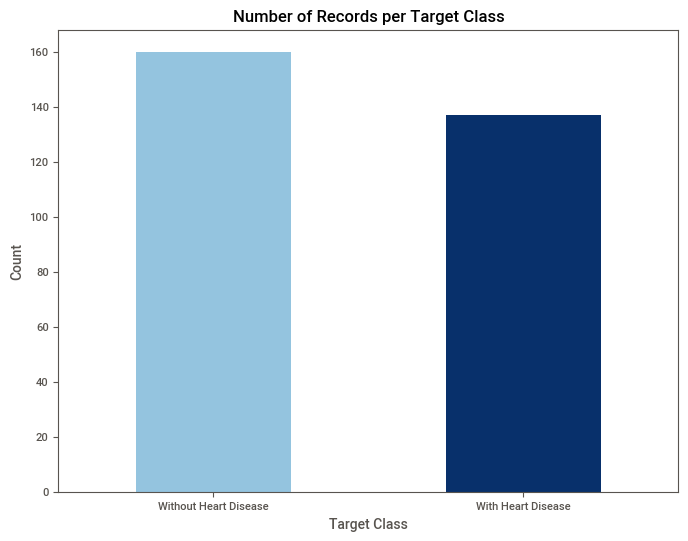

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plot_df = pd.DataFrame({'target': new_clev_DF['target']})

#chatgpt used to check how to plot this graph for with and withput heart disease
plot_df['target'].replace({0: 'Without Heart Disease', 1: 'With Heart Disease', 2: 'With Heart Disease', 3: 'With Heart Disease', 4: 'With Heart Disease'}, inplace=True)

target_counts = plot_df['target'].value_counts()

colors = plt.cm.get_cmap('Blues')(np.linspace(0.4, 1, len(target_counts)))

plt.figure(figsize=(8, 6))
ax = target_counts.plot(kind='bar', color=colors)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Number of Records per Target Class')
plt.xticks(rotation=0)
plt.show()


This shows the comparison of the count of data for people with and without heart disease

>Histograms of Cleveland data

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>],
       [<AxesSubplot: title={'center': 'trestbps'}>,
        <AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>],
       [<AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>,
        <AxesSubplot: title={'center': 'exang'}>],
       [<AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'target'}>]], dtype=object)

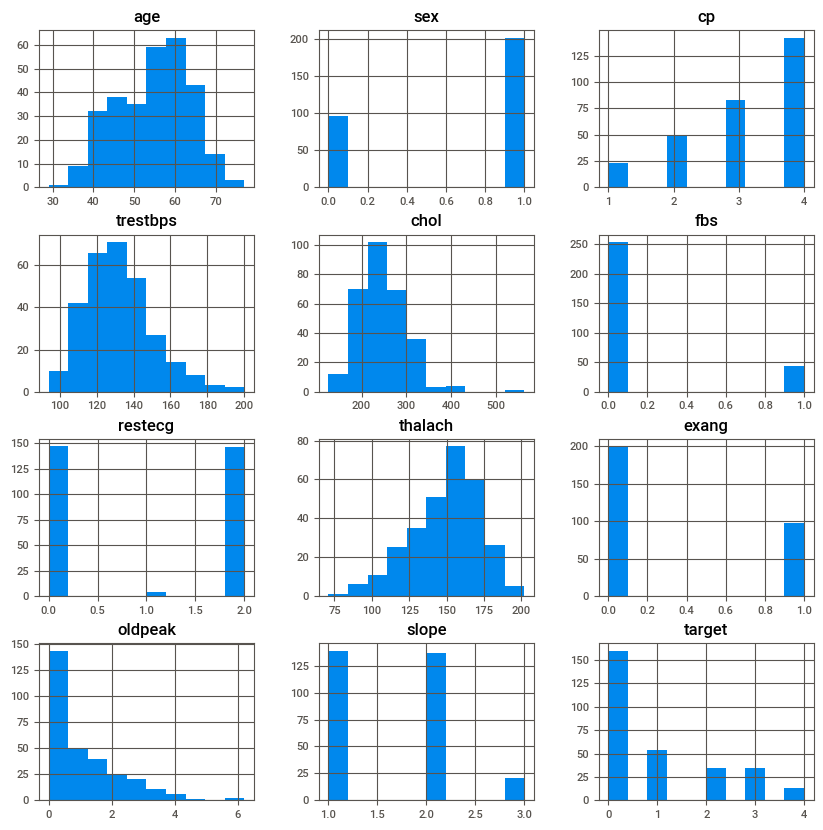

In [19]:
new_clev_DF.hist(figsize=(10, 10))

This shows the distribution of datasets in all features

>Age variation for target values

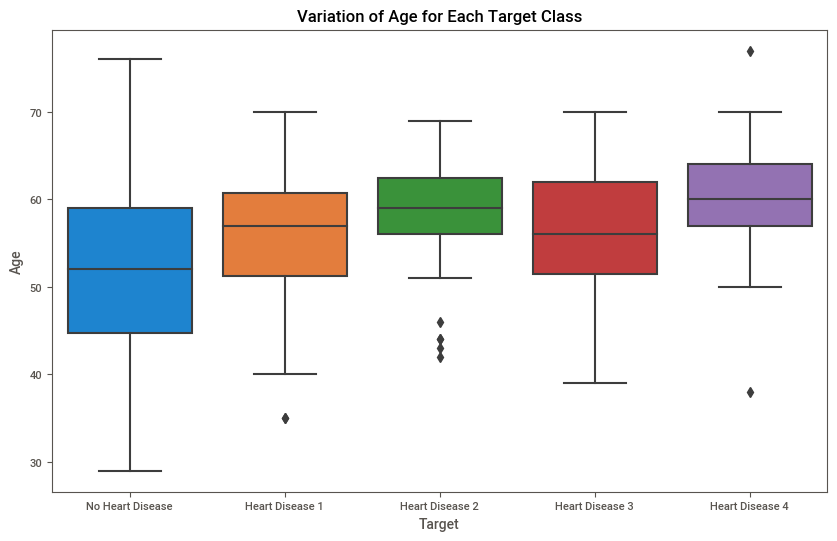

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=new_clev_DF)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Variation of Age for Each Target Class')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['No Heart Disease', 'Heart Disease 1', 'Heart Disease 2', 'Heart Disease 3', 'Heart Disease 4'])
plt.show()

This boxplot shows how age varies for each of the target values. 

>Pairplot analysis

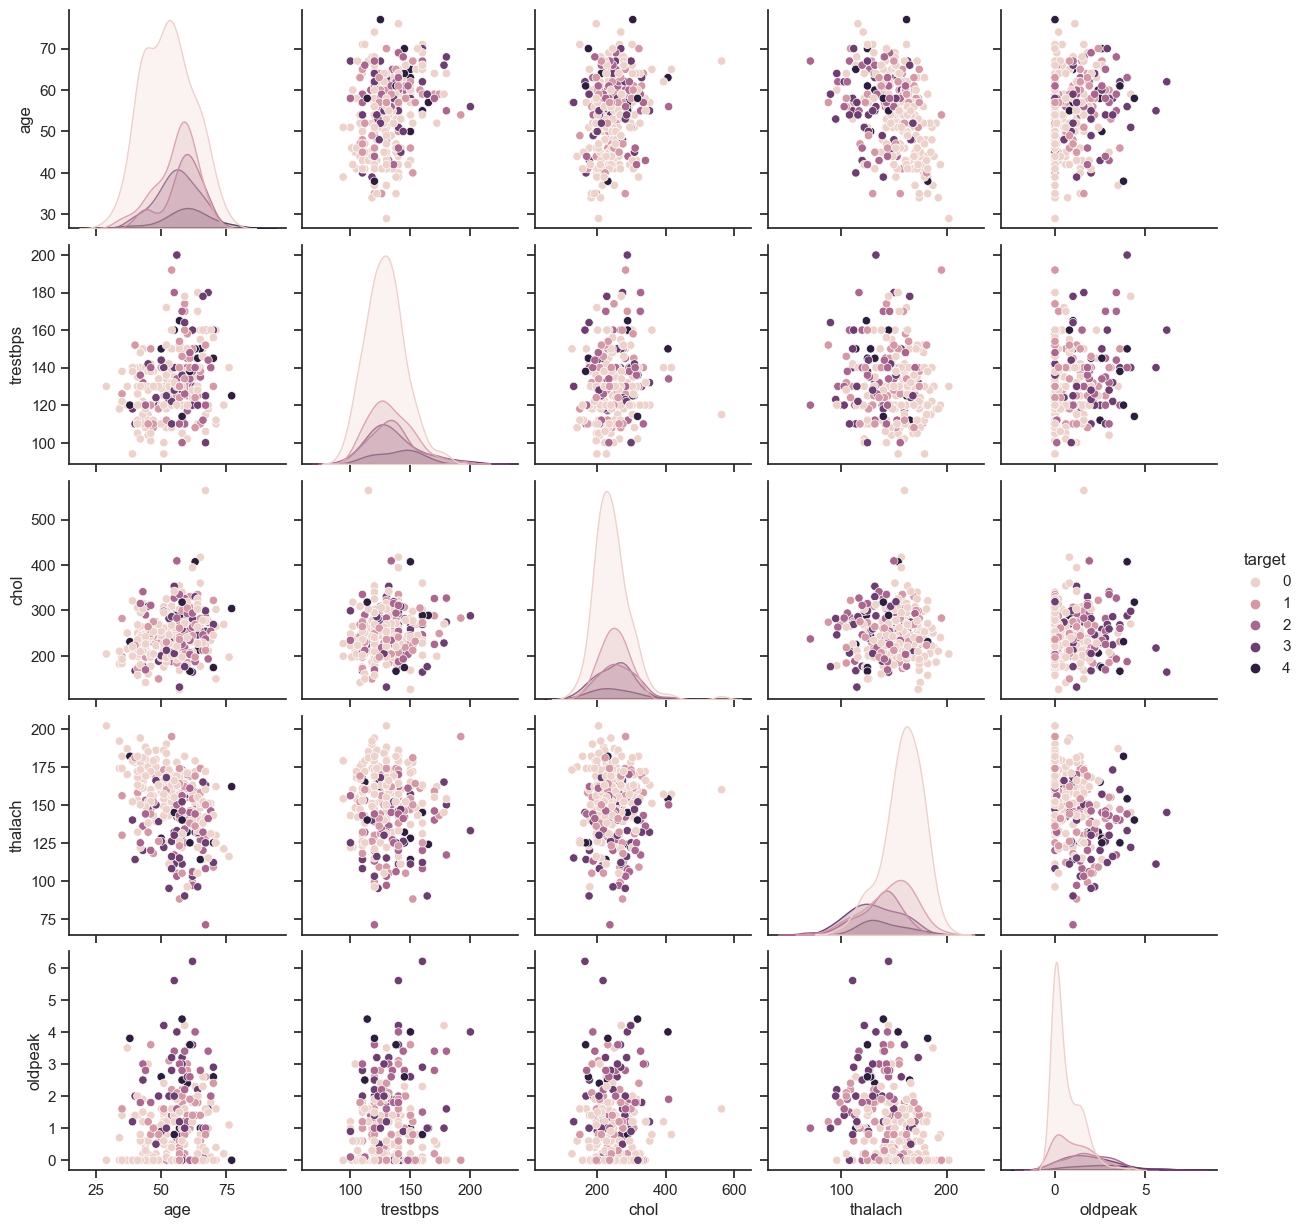

In [21]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
pairplot_data = new_clev_DF[selected_features]

sns.set(style="ticks")

sns.pairplot(pairplot_data, hue='target', diag_kind='kde')


This shows the pairplot analysis with the seaborn visulaization tool